## Joining Methods (20 points)

In [2]:
#import packages here
import numpy as np
import matplotlib.pyplot as plt

#### In this notebook, several aspects of joining methods will be considered.

### Question 1.1 (3 points)

#### Two carbon fibre parts are to be adhesively bonded, as in the figure below. The following information is provided: Adherends Youngs modulus = 70 GPa, adherends thickness = 2 mm, adherends width = 20 mm, adhesive shear modulus = 2.0 GPa, adhesive thickness = 0.3 mm, overlap length = 30 mm. The bonded part will be subjected to a tensile load of 50 kN.

#### - In the lectures you learned about the shear-stress distribution of such a joint. Plot the shear stress distribution over the lap joint for several overlap lengths (including at least: 10, 15, 20, 30, and 50 mm) according to the Klein model. Comment on the results.

#### - Then, repeat the exercise using the Volkersen model instead. What are the most notable differences?

![title](lapjoint.png)

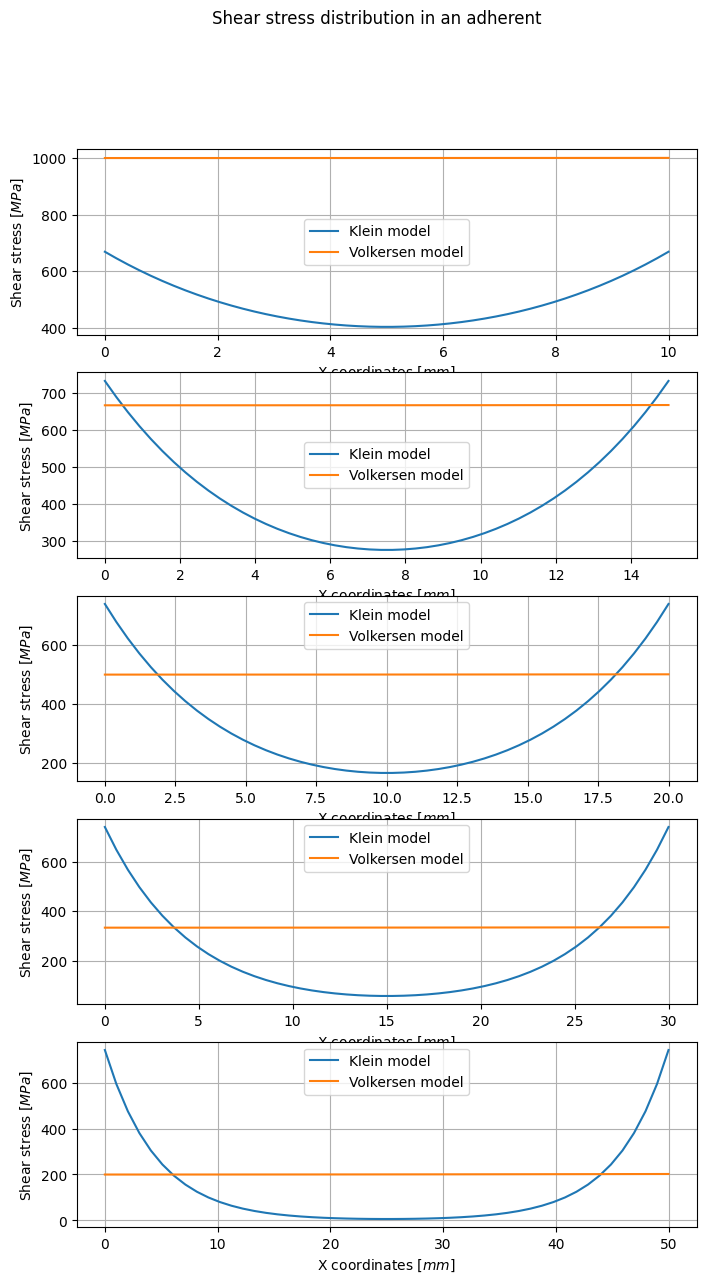

In [44]:
# Storing material properties in a convenient way
class Material:
    def __init__(self, G_kl=1, E1=1, t1=1, E2=1, t2=1, lu=1, d=1, b=1):
        self.G_kl = G_kl
        self.E1 = E1
        self.t1 = t1
        self.E2 = E2
        self.t2 = t2
        self.lu = lu
        self.d = d
        self.b =b


def klein_model(N, Mat, F_applied):
    G_kl, E1, t1, E2, t2, lu, d, b = (Mat.G_kl, Mat.E1, Mat.t1, Mat.E2, Mat.t2, Mat.lu, Mat.d, Mat.b)
    x_array = np.linspace(0, lu, N)

    tau_mean = F_applied / b / lu
    beta = ((E2 * t2 - E1 * t1) * G_kl * lu ** 2) / (E1 * t1 * (G_kl * lu**2 + E2 * t2 * d))
    omega = np.sqrt((G_kl * (E1 * t1 + E2 * t2) * lu ** 2) / (E1 * t1 * E2 * t2 * d))

    # Coeffs k used to split up the equation and make it more readable
    k1 = omega * tau_mean / (beta + 2) / (np.cosh(omega - 1))
    k2 = np.sinh(omega * (1 - x_array / lu))
    k3 = (beta + 1) * np.sinh(omega * x_array / lu)
    return x_array, k1 * (k2 + k3)


# https://www.sciencedirect.com/science/article/pii/S0143749612000103?casa_token=D7Ai3sGpUxQAAAAA:1-4qyEJVk9hVCwdG-v1fFVVwKeAgBbTQDcr0diMWQtP0TwG5Nq0KmNGA6aciT2WjdFyvUONqSzI
def volkersen_model(N, Mat, F_applied):
    G_kl, E1, t1, E2, t2, lu, d, b = (Mat.G_kl, Mat.E1, Mat.t1, Mat.E2, Mat.t2, Mat.lu, Mat.d, Mat.b)
    x_array = np.linspace(0, lu, N)

    E = E1
    t = t1
    omega = np.sqrt(G_kl / E / t * (1 + t1 / t2))

    taux = F_applied * omega * np.cosh(omega * x_array) / np.sinh(omega * lu / 2) # only if both adherents are the same
    return x_array, taux


F = 50e3
N = 50
lengths = np.array([10, 15, 20, 30, 50]) * 1e-3

fig, axs = plt.subplots(5, figsize=(8, 14))
fig.suptitle("Shear stress distribution in an adherent")


for idx, length in enumerate(lengths):
    # Mat1 = Material(t1=2e-3, t2=2e-3, b=20e-3, E1=70e9, E2=70e9, G_kl=2e9, d=0.3e-3, lu=length)
    Mat1 = Material(t1=3e-3, t2=3e-3, b=20e-3, E1=70e9, E2=70e9, G_kl=1e9, d=0.2e-3, lu=length)

    xs, taux_klein = klein_model(N, Mat1, F)
    xs, taux_volk = volkersen_model(N, Mat1, F)

    axs[idx].plot(xs * 1e3, taux_klein / 1e6, label="Klein model")
    axs[idx].plot(xs * 1e3, taux_volk / 1e4, label="Volkersen model")
    axs[idx].set_xlabel(r"X coordinates $[mm]$")
    axs[idx].set_ylabel(r"Shear stress $[MPa]$")
    axs[idx].legend()
    axs[idx].grid()
plt.show()


Comments: (double click to open)



Comments:



### Question 1.2 (2 points)

#### Show how the stress distribution changes when the thickness of the bottom adherend increases to 3mm and 4mm. Create a plot. Why can you expect these shapes of the curves? Answer in the textbox below your plot. Use the Klein model.

Answer:



### Question 2 (2 points)

#### In reality, shear stresses are not the only stresses acting on the lap joint. Due to eccentricity, another type of stress occurs which will lower the maximum carrying capacity. Elaborate on this type of stress and why it effects the maximum load that can be carried.

Answer:
In addition to the shear stress, the edges of the join will experience peel stresses. A joint with an eccentricity (like a lap joint) experiences "secondary bending" under a tensile load. This bending is quantified by measuring the "out-of-plane displacements of the neutral line of the joint". This bending of the neutral axis induces stresses normal to the substrate surface that have a peel action. Similarly to the shear stress, the peel stresses are especially large at the edges of the joint. The maximum load that an adhesively bonded lap joint can have is therefore limited by the peel stress experienced which needs to be lower than the maximum allowable.

(Schijve, Jaap. (2009). Fatigue of Structures and Materials. 10.1007/978-1-4020-6808-9., Mallick, P.K. (2007). Fiber-Reinforced Composites: Materials, Manufacturing, and Design, Third Edition (3rd ed.). CRC Press. https://doi.org/10.1201/9781420005981, Shigley JE, Mischke CR. Adhesive bonding and design considerations. In: Mechanical engineering design, 6th ed. McGraw-Hill; 2003. p. 562–78 (Chapters 9–11).)

### Question 3 (2 points)

#### Explain how step joints and scarf joints help in increasing the maximum carrying load, compared to lap joints. Do this by globally analyzing the differences between the 3 joint types, and how these differences result in different stresses.

Answer:
The fundamental difference between a lap joint and a scarf joint is the shear stress distribution over the lenght of the overlap. While the lap joint experiences a bathtub distribution, in an ideal scarf joint, the stress is constant along the entire lenght. Therefore, while the lap joint will have high peaks at the edges that rapidly lower into a relatively low value, the scarf joint will have the adhesive carrying the load homogeneously. This aspect of the scarf joint results is a lower maximum shear stress (for the same load and surface area). A lower maximum shear stress experienced results in a larger maximum carrying load, using the same material.

In both lap and scarf joints, the load is gradually transferred by the adhesive over the overlap lenght by an adherent to the other. The lack of the "bathtub" effect in a scarf joint is due to the fact that the over the overlap, the cross-section of the adherents changes gradually. The gradual change in thickness implies a change in stiffness of the adherent. The gradual change in thickness is matched by the gradual introduction of the load such that the deformation of an adherent's section with a lower thickness and a lower experienced stress matches the deformation of the other adherent's section with a larger thickness and a larger load. A step joint has characteristics of both a step and a scarf joint as it is intrinsically a sequence of smaller steps arranged with the geometry of a scarf joint section (alternatively could be called a discretised scarf joint). Depending on the number of steps and the lenght of the overlap, the deformation of the adherents may match more closely that of a lap joint or a scarf joint. For each of the constant-thickness sections, the stresses peak at the edges. The larger peaks stay at the absolute edges of the overlap and are larger than those of a scarf joint since the change in thickness is not gradually matching the shear stress transfer but are smaller than the peaks of a lap joint as the difference in deformation of the adherents is smaller. Coinciding with the thickness drops, a dip in the shear stress is experienced as the surfaces are perpendicular to the load direction.

There is a further remarkable advantage that scarf and step joints have over lap joint, it is the lack of secondary bending.This also contributes in raising the maximum carrying load.

The pictures illustrate the differences between the 3 different stress distributions, caused by the different geometries as explained above (SLJ = single lap joint).
(Picture from Barbosa, N.G.C., Campilho, R.D.S.G., Silva, F.J.G. et al. Comparison of different adhesively-bonded joint types for mechanical structures. Appl Adhes Sci 6, 15 (2018).)
![title](Joint_comparison.png)

### Question 4.1 (3 points)

#### The number of steps $n$ in a step joint has an effect on the shear-stress distribution in the bonded part. Write a function that takes the number of steps of the step joint as input, and returns the stress distribution over the entire bond length. Assume the steps are always equally spaced. Use the Volkersen model.

#### Show your results by creating a plot below, which shows $\tau$ over the given length of 30mm for different values of $n$. Assume the same material properties as in Question 1.

### Question 4.2 (2 points)

#### What happens when $n$ approaches infinity? Plot this using your code from question 4.1. Explain why the shape makes sense. Do this by comparing a step joint with $n$ steps and a scarf joint.

Answer:


### Question 5.1 (3 points)

#### Consider the scarf joint from the image below. Write a function that takes angle $\alpha$ as input and returns the shear- and tensile stresses. Then, use your function to plot the shear- and tensile stresses vs $\alpha$ for $0^{\circ} <\alpha<90 ^{\circ} $

#### The thickness $t$ of the part is 20 mm, the width $b$ is 30 mm. The part is subjected to a tensile force of 10 kN.

![title](scarfjoint.png)

### Question 5.2 (3 points)

#### At which value for $\alpha$ does the tensile stress peak? At which value for $\alpha$ does the shear stress peak? Explain why this makes sense. Plot a graph, which contains bond-area vs. $\alpha$, to support your explanation.

Answer:

